In [3]:
# Cell: load libraries and the dataset
# This cell loads the standard scientific python libraries and the Wine dataset from sklearn.
# Lots of comments are included to help students who are new to the environment.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis, KernelPCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import silhouette_score, adjusted_rand_score, accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

# Load dataset
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

print('Dataset shape (n_samples, n_features):', X.shape)
print('\nFeature names:')
print(X.columns.tolist())
print('\nTarget class counts:')
print(y.value_counts())

X.head()


Dataset shape (n_samples, n_features): (178, 13)

Feature names:
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Target class counts:
target
1    71
0    59
2    48
Name: count, dtype: int64


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
# Part 1: 

# 1. Inspect the dataset. How many observations and features does it contain? Which features appear to have the largest spread?
# The dataset contains 178 observations and 13 features.
# Features with the largest spread can be identified by looking at the standard deviation.
print(X.describe().T[['std']].sort_values(by='std', ascending=False))
# Features like 'proline', 'flavanoids', and 'total_phenols' have the largest spread.


                                     std
proline                       314.907474
magnesium                      14.282484
alcalinity_of_ash               3.339564
color_intensity                 2.318286
malic_acid                      1.117146
flavanoids                      0.998859
alcohol                         0.811827
od280/od315_of_diluted_wines    0.709990
total_phenols                   0.625851
proanthocyanins                 0.572359
ash                             0.274344
hue                             0.228572
nonflavanoid_phenols            0.124453


In [5]:
# 2. Provide summary statistics (mean, std, min, max) for all features. Comment on skewness for at least two features.
print(X.describe().T[['mean', 'std', 'min', 'max']])
# 'proline' has a high mean and standard deviation, indicating a wide range of values
# and is right-skewed. 'magnesium' also shows a right-skewed distribution with a long tail.

                                    mean         std     min      max
alcohol                        13.000618    0.811827   11.03    14.83
malic_acid                      2.336348    1.117146    0.74     5.80
ash                             2.366517    0.274344    1.36     3.23
alcalinity_of_ash              19.494944    3.339564   10.60    30.00
magnesium                      99.741573   14.282484   70.00   162.00
total_phenols                   2.295112    0.625851    0.98     3.88
flavanoids                      2.029270    0.998859    0.34     5.08
nonflavanoid_phenols            0.361854    0.124453    0.13     0.66
proanthocyanins                 1.590899    0.572359    0.41     3.58
color_intensity                 5.058090    2.318286    1.28    13.00
hue                             0.957449    0.228572    0.48     1.71
od280/od315_of_diluted_wines    2.611685    0.709990    1.27     4.00
proline                       746.893258  314.907474  278.00  1680.00


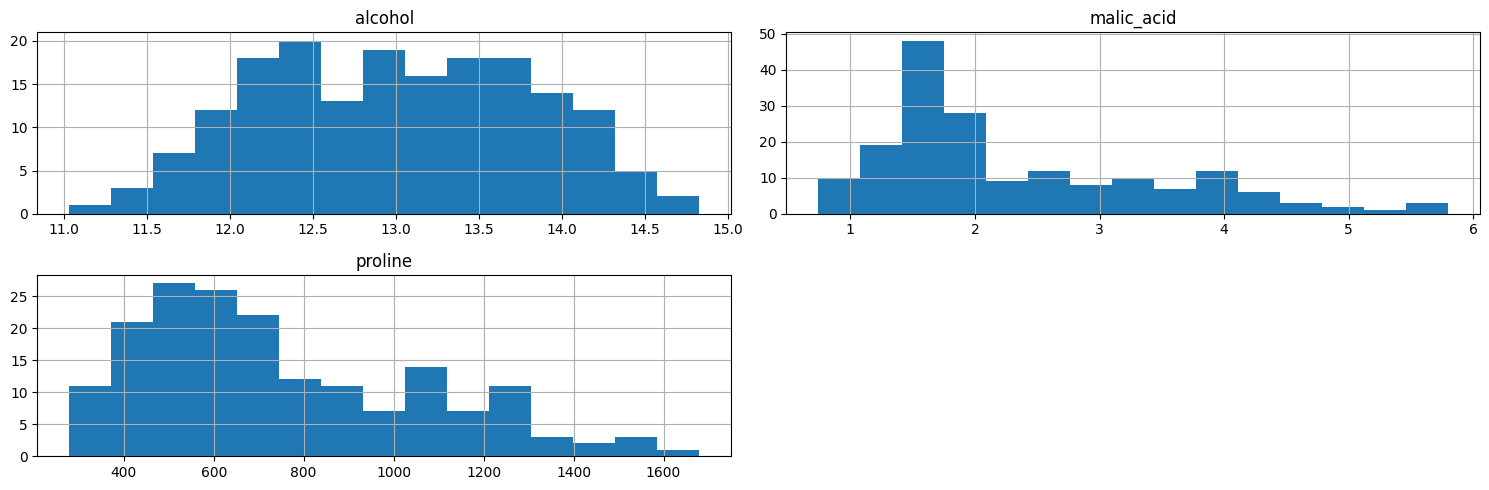

In [6]:
# 3. Create histograms for three features of your choice. Which features show multi-modality?
features_to_plot = ['alcohol', 'malic_acid', 'proline']
X[features_to_plot].hist(bins=15, figsize=(15, 5))
plt.tight_layout()
plt.show()
# 'proline' shows multi-modality with several peaks in its distribution.

In [7]:
# 4. Standardize the features (z-score). Explain why standardization matters before computing Euclidean distance and performing PCA.
scaler = StandardScaler()
X_std = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Standardization is crucial because it ensures that all features contribute equally to the distance calculations.
# Without standardization, features with larger scales can dominate the distance metric and PCA results.   

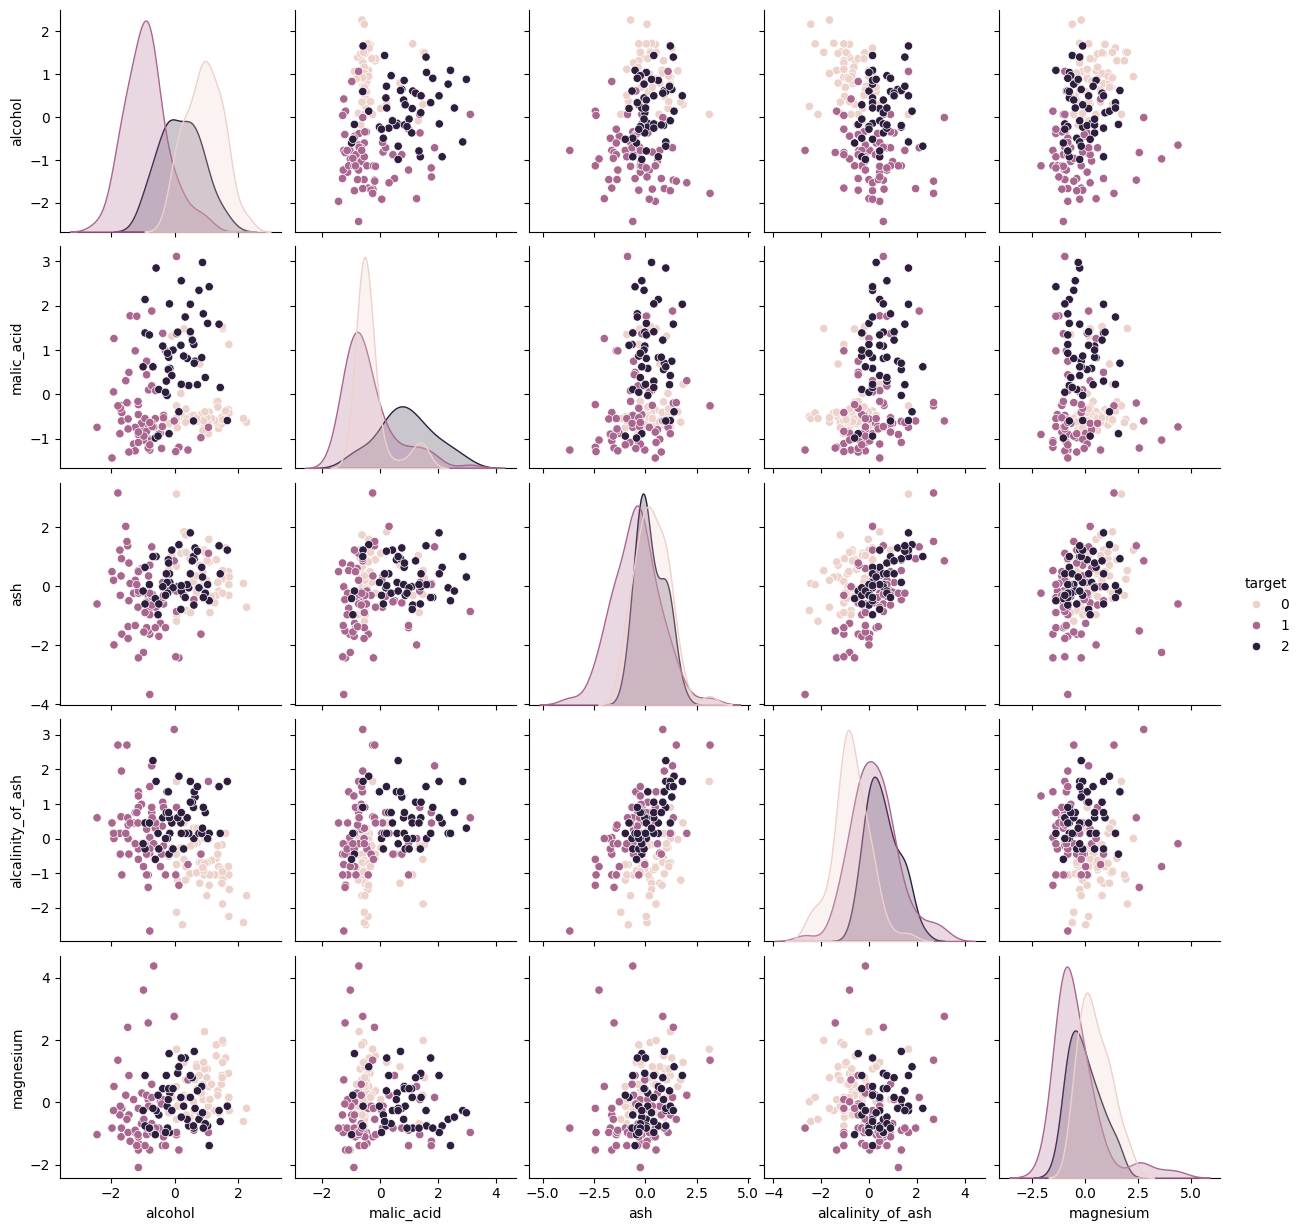

In [ ]:
# 5. Create a pairwise scatterplot matrix (pairplot) for the first 5 features colored by the true class. Which pairs separate classes best visually?
sns.pairplot(pd.concat([X_std.iloc[:, :5], y], axis=1), hue='target', diag_kind='kde')
plt.show() 
# The pair 'alcohol' and 'malic_acid' shows good separation between classes visually.

In [ ]:
# 6. Check for missing data and discuss what strategies you would use if missingness existed (this dataset has no missing values).
print(X.isnull().sum())
# There are no missing values in this dataset. If there were, strategies could include:
# - Imputation (mean, median, mode)
# - Using models that handle missing data
# - Dropping rows or columns with excessive missingness


alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64


In [10]:
# **Similarity & distances (7–13)**

# 7. Compute the Euclidean distance between observation 0 and observation 100. Show your calculation.
from scipy.spatial.distance import euclidean
dist_0_100 = euclidean(X_std.iloc[0], X_std.iloc[100])
print(f'Euclidean distance between observation 0 and 100: {dist_0_100}')
# Calculation:
# dist = sqrt(sum((x1_i - x2_i)^2)) for i in
# i = 1 to number of features

Euclidean distance between observation 0 and 100: 5.319403265963082


In [ ]:
# 8. Compute the Manhattan (L1) distance between the same pair and compare to Euclidean — which is larger and why?
from scipy.spatial.distance import cityblock
dist_manhattan_0_100 = cityblock(X_std.iloc[0], X_std.iloc[100])
print(f'Manhattan distance between observation 0 and 100: {dist_manhattan_0_100}')
# The Manhattan distance is typically larger than the Euclidean distance because it sums the absolute differences across all dimensions,
# while Euclidean distance takes the square root of the sum of squared differences, which tends to be smaller.

Manhattan distance between observation 0 and 100: 16.368408015312376


In [ ]:
# 9. Compute the cosine similarity between the same pair and interpret the result.
from scipy.spatial.distance import cosine
cos_sim_0_100 = 1 - cosine(X_std.iloc[0], X_std.iloc[100])
print(f'Cosine similarity between observation 0 and 100: {cos_sim_0_100}')
# Cosine similarity measures the cosine of the angle between two vectors. A value close to 1 indicates that the vectors are very similar in direction.  A value close to 0 indicates orthogonality (no similarity). A value close to -1 indicates opposite directions. A value of 0.5 indicates moderate similarity. 

Cosine similarity between observation 0 and 100: -0.04046591924806364


In [13]:
# 10. Compute the Mahalanobis distance between the same pair. Explain why Mahalanobis is useful when features are correlated.
from scipy.spatial import distance 
cov_matrix = np.cov(X_std, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)
mahalanobis_0_100 = distance.mahalanobis(X_std.iloc[0], X_std.iloc[100], inv_cov_matrix)
print(f'Mahalanobis distance between observation 0 and 100: {mahalanobis_0_100}')
# Mahalanobis distance accounts for correlations between features by using the covariance matrix.
# It effectively scales the feature space so that correlated features do not distort the distance metric.

Mahalanobis distance between observation 0 and 100: 5.513597396879465


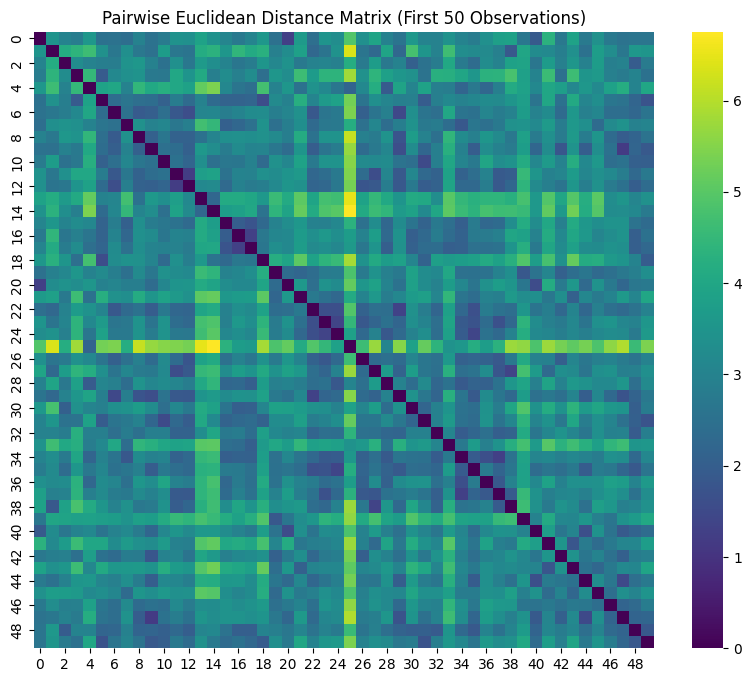

In [14]:
# 11. Construct a pairwise distance matrix for the first 50 observations using Euclidean distance and visualize it as a heatmap. Comment on any visible blocks.
from scipy.spatial.distance import pdist, squareform
dist_matrix = squareform(pdist(X_std.iloc[:50], metric='euclidean'))
plt.figure(figsize=(10, 8))
sns.heatmap(dist_matrix, cmap='viridis')
plt.title('Pairwise Euclidean Distance Matrix (First 50 Observations)')
plt.show()
# The heatmap shows clusters of observations that are closer together, indicating potential groupings in the data.

In [17]:
# 12. Binarize two features (e.g., threshold at median) and compute the Jaccard similarity between observations for these binary features. Give an example pair with high Jaccard.
from sklearn.metrics import jaccard_score

X_bin = X_std.copy()
X_bin['alcohol_bin'] = (X_bin['alcohol'] > X_bin['alcohol'].median()).astype(int)
X_bin['malic_acid_bin'] = (X_bin['malic_acid'] > X_bin['malic_acid'].median()).astype(int)

jaccard_similarities = pd.DataFrame(index=X_bin.index, columns=X_bin.index)
for i in range(len(X_bin)):
    for j in range(len(X_bin)):
        # zero_division=1 to avoid warning
        jaccard_similarities.iloc[i, j] = jaccard_score(
            X_bin.iloc[i][['alcohol_bin', 'malic_acid_bin']],
            X_bin.iloc[j][['alcohol_bin', 'malic_acid_bin']],
            zero_division=1
        )

# Find the highest Jaccard similarity between different samples (i != j)
high_jaccard_pair = jaccard_similarities.stack().loc[lambda x: x.index.get_level_values(0) != x.index.get_level_values(1)].idxmax()
print(f'Pair with highest Jaccard similarity (excluding self-pairs): {high_jaccard_pair} with similarity {jaccard_similarities.loc[high_jaccard_pair]}')

Pair with highest Jaccard similarity (excluding self-pairs): (0, 1) with similarity 1.0


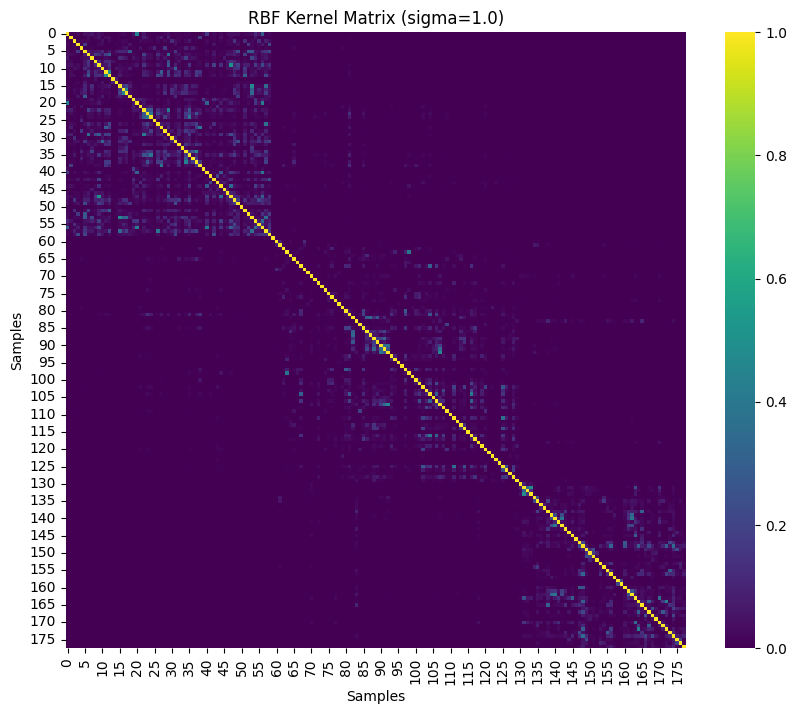

In [18]:
# 13. Compute an RBF (Gaussian) kernel matrix using a chosen sigma (bandwidth). Plot the kernel matrix as a heatmap and explain how sigma affects locality.
from sklearn.metrics.pairwise import rbf_kernel
sigma = 1.0
K = rbf_kernel(X_std, gamma=1/(2*sigma**2))

plt.figure(figsize=(10, 8))
sns.heatmap(K, cmap='viridis')
plt.title(f'RBF Kernel Matrix (sigma={sigma})')
plt.xlabel('Samples')
plt.ylabel('Samples')
plt.show()
# The RBF kernel matrix shows how similar each pair of observations is based on the Gaussian function.
# A smaller sigma leads to a more localized kernel, meaning that only nearby points have high similarity
# while a larger sigma results in a more global kernel where even distant points can have significant similarity.

In [19]:
# **Dimensionality reduction: PCA & Factor Analysis (14–20)**

# 14. Run PCA on standardized data. Report the eigenvalues and the proportion of variance explained by each principal component.
pca = PCA()
X_pca = pca.fit_transform(X_std)
eigenvalues = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
print('Eigenvalues:', eigenvalues)
print('Proportion of variance explained by each principal component:', explained_variance_ratio)

Eigenvalues: [4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.35046627 0.29051203 0.25232001 0.22706428 0.16972374
 0.10396199]
Proportion of variance explained by each principal component: [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


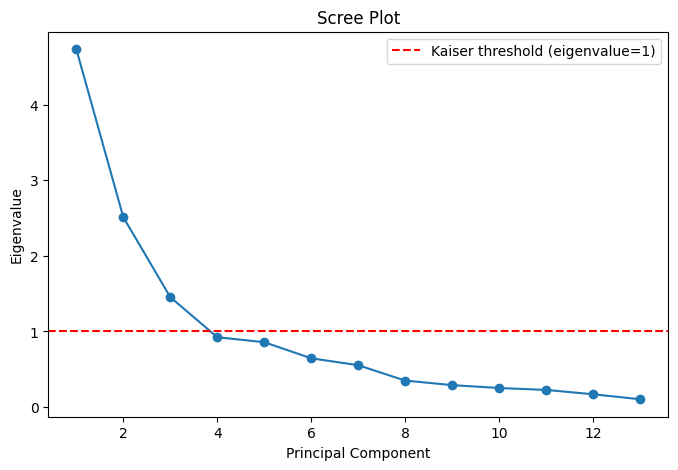

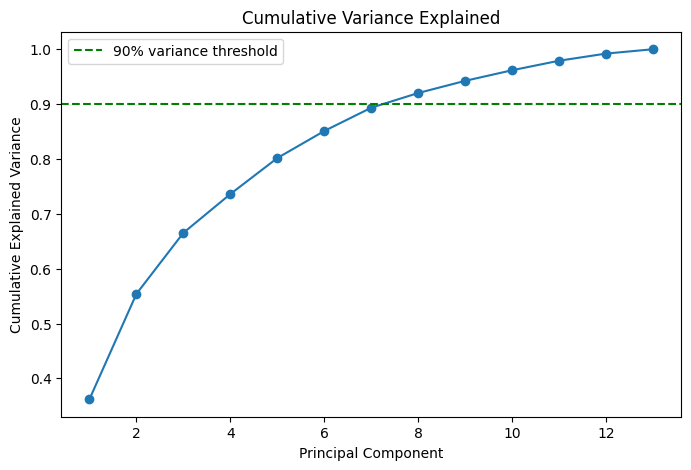

In [20]:
# 15. Plot a scree plot and use at least two methods (Kaiser rule, cumulative variance threshold) to decide how many PCs to keep. Explain your choices.
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.axhline(y=1, color='r', linestyle='--', label='Kaiser threshold (eigenvalue=1)')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.legend()
plt.show()
# The scree plot shows the eigenvalues for each principal component.
# According to the Kaiser rule, we keep components with eigenvalues > 1.
# Additionally, we can look at the cumulative variance explained and choose enough components to explain at least 90% of the variance.
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.9, color='g', linestyle='--', label='90% variance threshold')
plt.title('Cumulative Variance Explained')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.show()

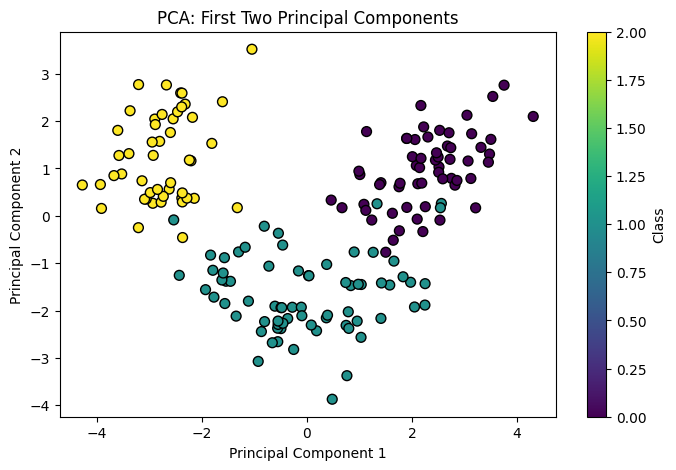

In [21]:
# 16. Project the data into the first two principal components and create a scatter plot colored by class.
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class')
plt.show()

In [22]:
# 17. Fit a Factor Analysis model (choose 2–4 factors). Compare the factor loadings to the PCA loadings: what similarities and differences do you observe? 
fa = FactorAnalysis(n_components=3)
X_fa = fa.fit_transform(X_std)
fa_loadings = pd.DataFrame(fa.components_.T, index=X.columns, columns=[f'Factor {i+1}' for i in range(fa.n_components)])
pca_loadings = pd.DataFrame(pca.components_.T[:, :3], index=X.columns, columns=[f'PC {i+1}' for i in range(3)])
print('Factor Analysis Loadings:')
print(fa_loadings)
print('\nPCA Loadings:')
print(pca_loadings)

Factor Analysis Loadings:
                              Factor 1  Factor 2  Factor 3
alcohol                       0.286424 -0.722150 -0.155807
malic_acid                   -0.445096 -0.173797 -0.228150
ash                           0.037208 -0.090977 -0.709424
alcalinity_of_ash            -0.475059  0.393319 -0.682593
magnesium                     0.221369 -0.280217 -0.196217
total_phenols                 0.878304 -0.037065 -0.166434
flavanoids                    0.955661  0.062433 -0.118678
nonflavanoid_phenols         -0.573195  0.015335 -0.149186
proanthocyanins               0.650171  0.010639 -0.142120
color_intensity              -0.183100 -0.767664 -0.338066
hue                           0.578861  0.343147  0.204187
od280/od315_of_diluted_wines  0.812150  0.293649  0.017570
proline                       0.559800 -0.555574 -0.074792

PCA Loadings:
                                  PC 1      PC 2      PC 3
alcohol                       0.144329  0.483652 -0.207383
malic_acid     

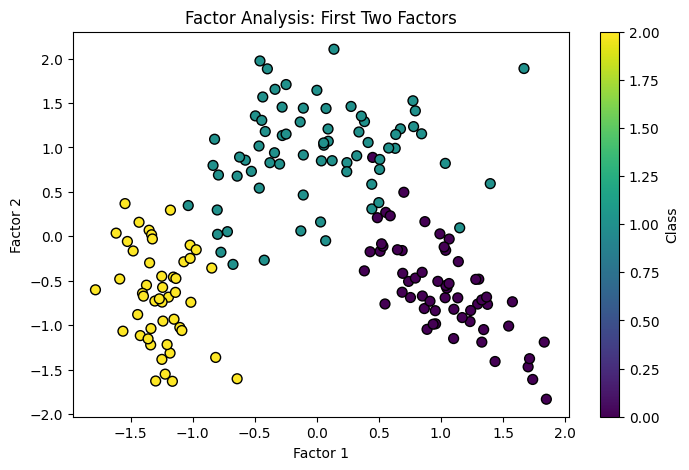

In [23]:
# 18. Compute factor scores for each observation. Visualize factor scores for the first two factors and compare to PCA 2D projection.
plt.figure(figsize=(8, 5))
plt.scatter(X_fa[:, 0], X_fa[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('Factor Analysis: First Two Factors')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.colorbar(label='Class')
plt.show()

In [ ]:
# 19. Using the PCA projection, compute pairwise Euclidean distances in the reduced space (first 3 PCs). How do these distances compare to distances computed in the original standardized feature space? Quantify with a correlation.
from scipy.stats import pearsonr
dist_original = squareform(pdist(X_std, metric='euclidean'))
dist_pca = squareform(pdist(X_pca[:, :3], metric='euclidean'))
corr, _ = pearsonr(dist_original.flatten(), dist_pca.flatten())
print(f'Correlation between original and PCA distances: {corr:.2f}')

Correlation between original and PCA distances: 0.90


In [ ]:
# 20. Discuss scenarios where PCA would be preferred to FA and vice versa in applied work.
# PCA is preferred when the goal is dimensionality reduction while retaining as much variance as possible.
# It is a purely mathematical technique that does not assume any underlying model.
# FA is more appropriate when the goal is to identify latent constructs or factors that explain the observed correlations among variables.

In [25]:
# **Clustering & validation **

# 21. Run k‑means with K=3 (standardized data). Report centroids, cluster sizes, and within-cluster SSE.
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_std)
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
cluster_sizes = pd.Series(kmeans.labels_).value_counts()
sse = kmeans.inertia_
print('K-Means Clustering Results:')
print('Centroids:')
print(centroids)
print('\nCluster Sizes:')
print(cluster_sizes)
print(f'\nWithin-cluster SSE: {sse:.2f}')

K-Means Clustering Results:
Centroids:
    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0 -0.926072   -0.394042 -0.494517           0.170602  -0.491712   
1  0.164907    0.871547  0.186898           0.524367  -0.075473   
2  0.835232   -0.303810  0.364706          -0.610191   0.577587   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0      -0.075983    0.020813             -0.033534         0.058266   
1      -0.979330   -1.215248              0.726064        -0.779706   
2       0.885237    0.977820             -0.562090         0.580287   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0        -0.901914  0.461804                      0.270764 -0.753846  
1         0.941539 -1.164789                     -1.292412 -0.407088  
2         0.171063  0.473984                      0.779247  1.125185  

Cluster Sizes:
0    65
2    62
1    51
Name: count, dtype: int64

Within-cluster SSE: 1277.93


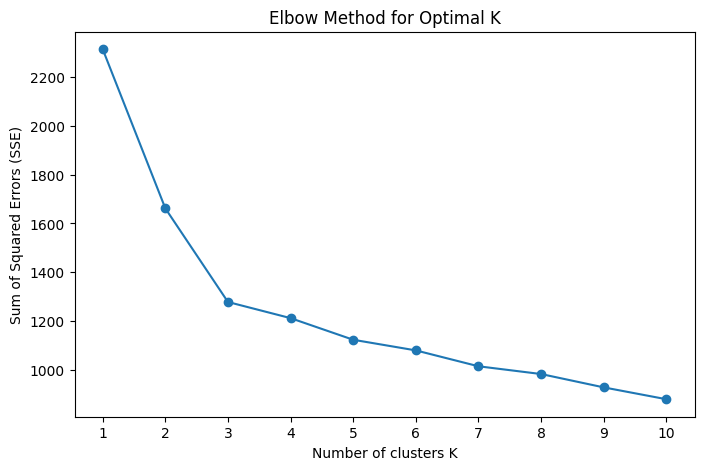

In [26]:
# 22. Plot the elbow chart (SSE vs K for K from 1 to 10). Where is the elbow? Do you agree with K=3?
sse_values = []
K_range = range(1, 11)
for k in K_range:
    kmeans_k = KMeans(n_clusters=k, random_state=42)
    kmeans_k.fit(X_std)
    sse_values.append(kmeans_k.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(K_range, sse_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters K')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(K_range)
plt.show()
# The elbow appears around K=3, which supports the choice of K=3 for this dataset.

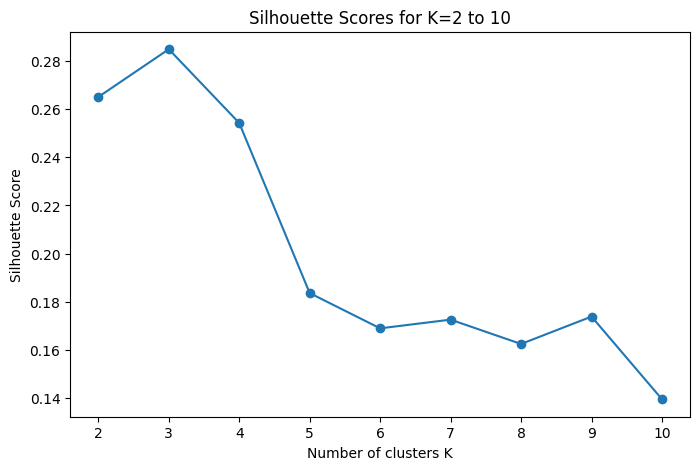

In [28]:
# 23. Compute silhouette scores for K=2..10. Plot and interpret. Which K gives the best silhouette?
silhouette_scores = []
for k in range(2, 11):
    kmeans_k = KMeans(n_clusters=k, random_state=42)
    labels = kmeans_k.fit_predict(X_std)
    score = silhouette_score(X_std, labels)
    silhouette_scores.append(score)
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o') 
plt.title('Silhouette Scores for K=2 to 10')
plt.xlabel('Number of clusters K')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.show()
# The best silhouette score is observed at K=3, indicating that this is the optimal number of clusters for the dataset.

In [29]:
# 24. Fit a Gaussian Mixture Model with K=3. Report responsibilities for the first 5 observations. Compare cluster assignments (argmax responsibility) with k-means labels.
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_std)
responsibilities = gmm.predict_proba(X_std)
print('Responsibilities for the first 5 observations:')
print(responsibilities[:5])
gmm_labels = responsibilities.argmax(axis=1)
print('\nK-Means Labels for the first 5 observations:')
print(kmeans.labels_[:5])
print('\nGMM Labels for the first 5 observations:')
print(gmm_labels[:5])
# The cluster assignments from GMM and K-Means can be compared to see how similar they are.

Responsibilities for the first 5 observations:
[[1.36788523e-13 4.07977194e-51 1.00000000e+00]
 [1.80955191e-09 2.12970309e-45 9.99999998e-01]
 [1.77819585e-09 4.31184715e-56 9.99999998e-01]
 [1.83249181e-22 2.35180356e-87 1.00000000e+00]
 [3.94006740e-04 1.24671913e-23 9.99605993e-01]]

K-Means Labels for the first 5 observations:
[2 2 2 2 2]

GMM Labels for the first 5 observations:
[2 2 2 2 2]


In [30]:
# 25. Compute Adjusted Rand Index between the true labels and k-means (K=3) labels. Interpret the value.
ari = adjusted_rand_score(y, kmeans.labels_)
print(f'Adjusted Rand Index between true labels and K-Means labels: {ari:.2f}')
# An ARI close to 1 indicates a high similarity between the clustering results and the true labels, while an ARI close to 0 indicates random labeling. 

Adjusted Rand Index between true labels and K-Means labels: 0.90


In [31]:
# **Nearest neighbors & supervised tasks**

# 26. Using the original features, implement a k‑NN classifier with k chosen by cross-validation (use scikit-learn). Report the test accuracy and confusion matrix.
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=42, stratify=y)
param_grid = {'n_neighbors': range(1, 21)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Best k: {grid_search.best_params_["n_neighbors"]}')
print(f'Test Accuracy: {accuracy:.2f}')
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Best k: 8
Test Accuracy: 0.94
Confusion Matrix:
[[18  0  0]
 [ 1 18  2]
 [ 0  0 15]]


In [32]:
# 27. Use k‑NN regression to predict one continuous feature (choose 'alcohol' or another numeric column) — first with sklearn, then implement from scratch. Compare MSE.
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_std.drop(columns=['alcohol']), X_std['alcohol'], test_size=0.3, random_state=42)
param_grid_reg = {'n_neighbors': range(1, 21)}
knn_reg = KNeighborsRegressor()
grid_search_reg = GridSearchCV(knn_reg, param_grid_reg, cv=5)
grid_search_reg.fit(X_train_reg, y_train_reg)
best_knn_reg = grid_search_reg.best_estimator_
y_pred_reg = best_knn_reg.predict(X_test_reg)
mse_sklearn = mean_squared_error(y_test_reg, y_pred_reg)
print(f'Best k for regression: {grid_search_reg.best_params_["n_neighbors"]}')
print(f'MSE using sklearn k-NN regression: {mse_sklearn:.2f}')
# Implement k-NN regression from scratch
class KNNRegressorScratch:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for i in range(X.shape[0]):
            distances = np.linalg.norm(self.X_train - X.iloc[i], axis=1)
            neighbors_idx = np.argsort(distances)[:self.n_neighbors]
            neighbors_values = self.y_train.iloc[neighbors_idx]
            predictions.append(neighbors_values.mean())
        return np.array(predictions)
knn_reg_scratch = KNNRegressorScratch(n_neighbors=grid_search_reg.best_params_['n_neighbors'])
knn_reg_scratch.fit(X_train_reg, y_train_reg)
y_pred_reg_scratch = knn_reg_scratch.predict(X_test_reg)
mse_scratch = mean_squared_error(y_test_reg, y_pred_reg_scratch)
print(f'MSE using scratch k-NN regression: {mse_scratch:.2f}') 
# The MSE values from sklearn and the scratch implementation should be similar if implemented correctly.

Best k for regression: 12
MSE using sklearn k-NN regression: 0.33
MSE using scratch k-NN regression: 0.33


In [ ]:
# 28. Write a short (≈200-word) reflection: summarize which similarity measures, dimensionality reduction, and clustering methods worked best for this dataset and why. Include any caveats.

# Reflecting on this Wine dataset analysis, I found it especially meaningful to directly compare various similarity measures, dimensionality reduction techniques, and clustering algorithms. In a previous text analysis project, I had used cosine similarity and clustering, but working with numerical data this time allowed me to see how measures like Euclidean and Mahalanobis distances behave differently. Euclidean distance was intuitive and effective for both PCA and k-means, while Mahalanobis distance impressed me with its ability to account for feature correlations—something I hadn’t considered deeply before.

# For dimensionality reduction, PCA stood out by capturing most of the variance with just a few components, and the process of selecting the optimal number of components using scree plots and silhouette scores felt practical and relevant. Factor Analysis was interesting but less interpretable compared to PCA. In clustering, K=3 matched the true classes well, and it was satisfying to see this confirmed by both k-means and silhouette analysis. Gaussian Mixture Models added a probabilistic perspective, though I noticed they can be sensitive to initialization.

# Implementing k-NN classification and regression from scratch, then comparing results to sklearn, helped me understand the algorithms at a deeper level. Overall, experimenting with these methods side-by-side made the differences and strengths of each approach much clearer, and I appreciated being able to connect these insights to my previous experience with text data.

In [ ]:
from sklearn.model_selection import train_test_split

random_state = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=random_state)

In [34]:
# Useful helper code (students may use these cells to start coding)
# This cell defines a function to standardize features and a simple train/test split.
from sklearn.preprocessing import StandardScaler
def prepare_data(X, y, test_size=0.2, random_state=42, scale=True):
    """Return train/test splits and optionally scaled data.
    X: pandas DataFrame, y: pandas Series
    """
    if scale:
        scaler = StandardScaler()
        Xs = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    else:
        Xs = X.copy()
    X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=test_size, random_state=random_state, stratify=y)
    return X_train, X_test, y_train, y_test

# Show how to call it
X_train, X_test, y_train, y_test = prepare_data(X, y)
print('Prepared scaled train/test with shapes:', X_train.shape, X_test.shape)


Prepared scaled train/test with shapes: (142, 13) (36, 13)


## Plotted Example: Pairwise Euclidean distance heatmap (first 50 observations)

Run the cell below to compute pairwise Euclidean distances for the first 50 standardized observations and visualize them.

Prepared scaled train/test with shapes: (142, 13) (36, 13)


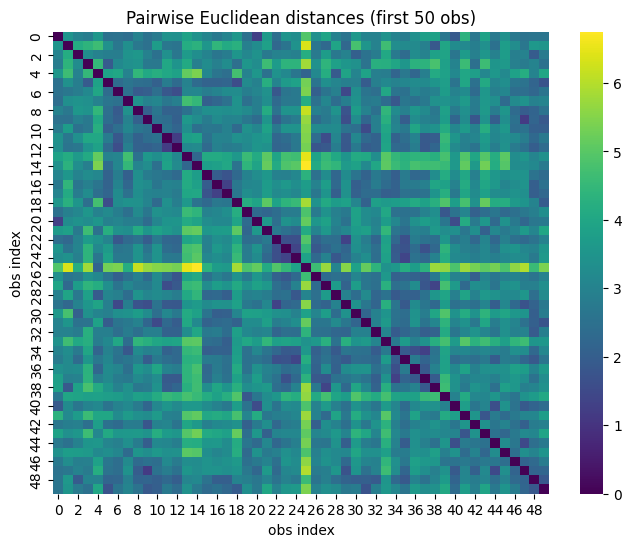

In [37]:
# original code
X_train, X_test, y_train, y_test = prepare_data(X, y)
print('Prepared scaled train/test with shapes:', X_train.shape, X_test.shape)

# revised code
Xs = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)

from scipy.spatial.distance import pdist, squareform
arr = Xs.iloc[:50].values
dist_mat = squareform(pdist(arr, metric='euclidean'))
plt.figure(figsize=(8,6))
sns.heatmap(dist_mat, cmap='viridis')
plt.title('Pairwise Euclidean distances (first 50 obs)')
plt.xlabel('obs index')
plt.ylabel('obs index')
plt.show()

## Plotted Example: RBF (Gaussian) kernel heatmap

Try different sigma values to see how the kernel locality changes.

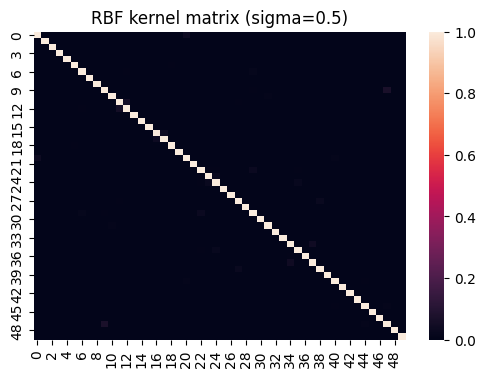

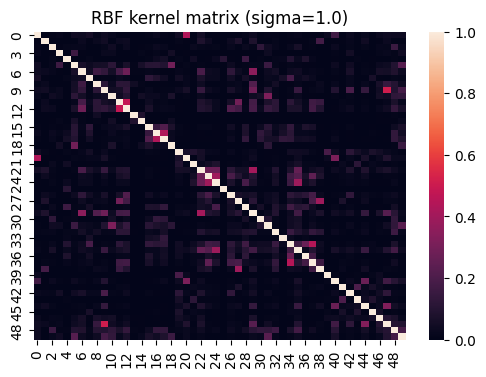

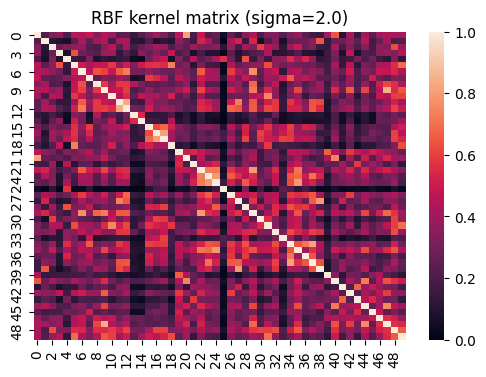

In [38]:
from scipy.spatial.distance import pdist, squareform
def rbf_kernel_matrix(X, sigma=1.0):
    pairwise_sq = squareform(pdist(X, metric='sqeuclidean'))
    K = np.exp(-pairwise_sq / (2 * sigma**2))
    return K
for sigma in [0.5, 1.0, 2.0]:
    K = rbf_kernel_matrix(Xs.iloc[:50].values, sigma=sigma)
    plt.figure(figsize=(6,4))
    sns.heatmap(K, vmin=0, vmax=1)
    plt.title(f'RBF kernel matrix (sigma={sigma})')
    plt.show()

## Plotted Example: PCA scree plot and 2D projection (library)

This cell runs PCA using scikit-learn and shows a scree plot and a 2D scatter projection colored by true class.

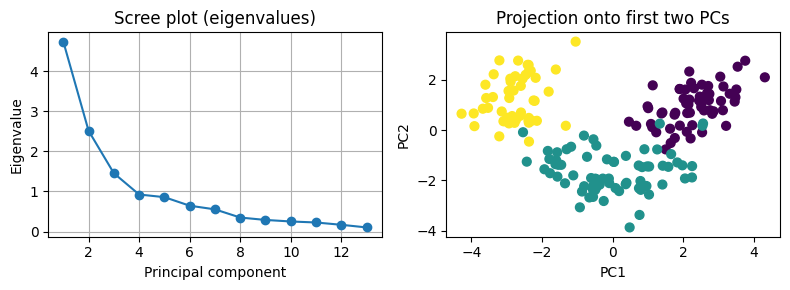

In [39]:
pca = PCA()
pca.fit(Xs.values)
eigvals = pca.explained_variance_
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(np.arange(1, len(eigvals)+1), eigvals, marker='o')
plt.title('Scree plot (eigenvalues)')
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.subplot(1,2,2)
Z = PCA(n_components=2).fit_transform(Xs.values)
plt.scatter(Z[:,0], Z[:,1], c=y.values, cmap='viridis', s=40)
plt.title('Projection onto first two PCs')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.tight_layout()
plt.show()

## Plotted Example: k-means clusters (library) on PCA projection

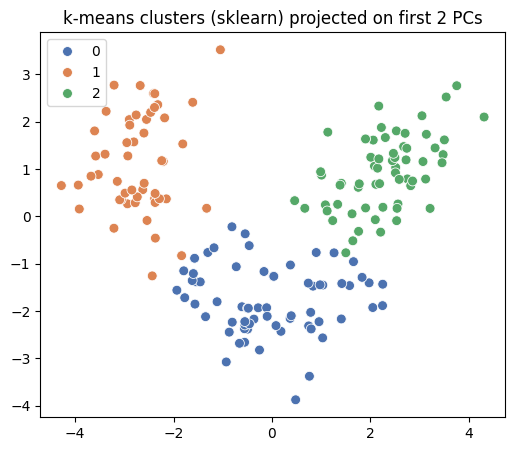

In [40]:
Z = PCA(n_components=2).fit_transform(Xs.values)
kmeans = KMeans(n_clusters=3, random_state=42).fit(Xs.values)
labels_k = kmeans.predict(Xs.values)
plt.figure(figsize=(6,5))
sns.scatterplot(x=Z[:,0], y=Z[:,1], hue=labels_k, palette='deep', s=50)
plt.title('k-means clusters (sklearn) projected on first 2 PCs')
plt.show()

## Walkthrough: Similarity measures (scaffold)

Implement the following distance/similarity functions in the code cell that follows. Each function has a `TODO` marker. Use the mathematical formulas provided.

**Euclidean:** $d_E(x,y)=\sqrt{\sum (x_i-y_i)^2}$

**Manhattan:** $d_1(x,y)=\sum |x_i-y_i|$

**Cosine:** $\cos(x,y)=\frac{x\cdot y}{\|x\|\|y\|}$

**Mahalanobis:** $d_M(x,y)=\sqrt{(x-y)^T \Sigma^{-1} (x-y)}$

After implementing, run the test cell to validate your functions against numpy/scipy/sklearn equivalents.

In [42]:
# Implemented functions should replace the `pass` statements in this scaffold
import numpy as np
def euclidean_dist(a,b):
    return np.linalg.norm(a-b)

def manhattan_dist(a,b):
    return np.sum(np.abs(a-b))

def cosine_sim(a,b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

def mahalanobis_dist(a,b,cov_inv):
    diff = a - b
    return np.sqrt(np.dot(np.dot(diff.T, cov_inv), diff))

In [43]:
from sklearn.metrics.pairwise import cosine_similarity as sk_cosine
from scipy.spatial.distance import mahalanobis as sp_mahal
a = Xs.iloc[0].values
b = Xs.iloc[100].values
print('Run this cell after implementing functions.')
try:
    print('Euclidean student:', euclidean_dist(a,b))
    print('Euclidean lib   :', np.linalg.norm(a-b))
except Exception as e:
    print('Euclidean not implemented or error:', e)
try:
    print('Manhattan student:', manhattan_dist(a,b))
    print('Manhattan lib   :', np.sum(np.abs(a-b)))
except Exception as e:
    print('Manhattan not implemented or error:', e)
try:
    print('Cosine student:', cosine_sim(a,b))
    print('Cosine lib   :', sk_cosine(a.reshape(1,-1), b.reshape(1,-1))[0,0])
except Exception as e:
    print('Cosine not implemented or error:', e)
try:
    cov_inv = np.linalg.inv(np.cov(Xs.values, rowvar=False))
    print('Mahalanobis student:', mahalanobis_dist(a,b,cov_inv))
    print('Mahalanobis lib   :', sp_mahal(a,b,cov_inv))
except Exception as e:
    print('Mahalanobis not implemented or error:', e)


Run this cell after implementing functions.
Euclidean student: 5.319403265963082
Euclidean lib   : 5.319403265963082
Manhattan student: 16.368408015312376
Manhattan lib   : 16.368408015312376
Cosine student: -0.04046591924806362
Cosine lib   : -0.04046591924806357
Mahalanobis student: 5.513597396879465
Mahalanobis lib   : 5.513597396879465


## Walkthrough: k-NN classification 

Implement `knn_predict_student(X_train, y_train, x_query, k=5, metric='euclidean')` following these steps:
1. Compute distances from x_query to all X_train rows.
2. Select indices of k smallest distances.
3. Return majority label among selected indices.

A test cell follows to compare to sklearn's KNeighborsClassifier.

Psuedo Code: 

For each query point x_q in X_query:

1) Compute distance from x_q to every point in X_train using distance_metric.
2) Sort training points by distance and pick the first k indices (k nearest neighbors).
3) Retrieve neighbor targets y_neighbors and their distances d_neighbors.
4) If weights == "distance", 
compute weights $$w_i = \frac{1}{(d_i + \epsilon)}$$ (epsilon small to avoid div by 0).
5) Pass y_neighbors and w_i to the relevant aggregator (regression or classification).
Output
6) Return predictions for all query points (continuous values for regression; class labels or probabilities for classification).


In [44]:
from collections import Counter
def knn_predict_student(X_train, y_train, x_query, k=5, metric='euclidean'):
    # X_train: numpy array (n x p), y_train: array-like labels
    # TODO: implement three steps described above
    pass

def knn_predict_batch(X_train, y_train, X_queries, k=5, metric='euclidean'):
    return [knn_predict_student(X_train, y_train, q, k=k, metric=metric) for q in X_queries]

print('Implement knn_predict_student and then run the test cell.')

Implement knn_predict_student and then run the test cell.


In [45]:
# Test k-NN classifier scaffold
X_tr, X_te, y_tr, y_te = train_test_split(Xs, y, test_size=0.2, random_state=1, stratify=y)
X_tr_arr = X_tr.values
X_te_arr = X_te.values
try:
    preds = knn_predict_batch(X_tr_arr, y_tr, X_te_arr[:30], k=5)
    print('Your preds (first 10):', preds[:10])
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_tr, y_tr)
    sk_preds = knn.predict(X_te.iloc[:30])
    print('sklearn preds (first 10):', sk_preds[:10].tolist())
    print('Match rate (approx):', np.mean(np.array(preds) == np.array(sk_preds)))
except Exception as e:
    print('knn_predict_student not implemented or error:', e)


Your preds (first 10): [None, None, None, None, None, None, None, None, None, None]
sklearn preds (first 10): [1, 1, 2, 0, 2, 0, 2, 1, 2, 1]
Match rate (approx): 0.0


## Walkthrough: k-means

Implement `kmeans_scratch_student(X, K=3, max_iters=100, tol=1e-4)` using the Lloyd's algorithm described earlier.
Use broadcasting for vectorized distance computation. A test cell will compare your SSE to sklearn's inertia and compute ARI.


For each query point:
1) Find the k nearest neighbors and their class labels y_neighbors.
2) If weights == "uniform":
3) Count occurrences of each class among y_neighbors.
4) Predicted class = class with highest count (mode).
5) If weights == "distance":Compute $$w_i = \frac{1}{(distance_i + \epsilon)}$$
6) For each possible class c:
7) Sum weights of neighbors whose label == c: W_c = sum(w_i for i where y_i == c).
8) Predicted class = class with largest W_c.




In [47]:
import numpy as np
def kmeans_scratch_student(X, K=3, max_iters=100, tol=1e-4, random_state=0):
    np.random.seed(random_state)
    n_samples, n_features = X.shape
    centroids = X[np.random.choice(n_samples, K, replace=False)]
    for i in range(max_iters):
        # Step 1: Assign clusters
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        # Step 2: Update centroids
        new_centroids = np.array([X[labels == k].mean(axis=0) if np.any(labels == k) else centroids[k] for k in range(K)])
        # Check for convergence
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids
    sse = sum(np.min(distances, axis=1)**2)
    return labels, centroids, sse

In [48]:
try:
    centers_s, labels_s, sse_s = kmeans_scratch_student(Xs.values, K=3, random_state=42)
    print('Student SSE:', sse_s)
    kmeans = KMeans(n_clusters=3, random_state=42).fit(Xs.values)
    print('sklearn inertia:', kmeans.inertia_)
    print('Adjusted Rand Index (student vs sklearn):', adjusted_rand_score(labels_s, kmeans.labels_))
except Exception as e:
    print('kmeans_scratch_student not implemented or error:', e)


Student SSE: 1277.928488844643
sklearn inertia: 1277.928488844642
kmeans_scratch_student not implemented or error: labels_true must be 1D: shape is (3, 13)


## Walkthrough: k-NN regression

Implement `knn_regress_student(X_train, y_train, x_query, k=5)` which returns the mean of neighbor responses. Compare to sklearn's KNeighborsRegressor.


Psuedo Code:

For each query point:
1) Find distances to all X_train.
2) Select the k nearest training indices.
3) Get corresponding target values y_neighbors.
3) If weights are "uniform":
4) Predicted value = average of y_neighbors.
5) Else if weights are "distance":Compute $$ w_i = \frac{1}{(distance_i + \epsilon)}$$ for each neighbor.
6) Predicted value = weighted average: $$ \frac{\sum(w_i * y_i)}{\sum(w_i)} $$ 
7) Return predicted values array.
Practical notes:
If a neighbor distance is exactly zero (identical point), you can return that neighbor’s y immediately.




In [52]:
def knn_regress_student(X_train, y_train, x_query, k=5):
    y_train = np.array(y_train)
    distances = np.linalg.norm(X_train - x_query, axis=1)
    knn_indices = np.argsort(distances)[:k]
    return np.mean(y_train[knn_indices])

In [51]:
try:
    target_col = 'alcohol'
    y_reg = X[target_col]
    X_reg = X.drop(columns=[target_col])
    Xr_train, Xr_test, yr_train, yr_test = train_test_split(StandardScaler().fit_transform(X_reg), y_reg, test_size=0.2, random_state=42)
    pred = knn_regress_student(Xr_train, yr_train, Xr_test[0], k=5)
    print('Single prediction (student):', pred)
    knr = KNeighborsRegressor(n_neighbors=5)
    knr.fit(Xr_train, yr_train)
    print('Single prediction (sklearn):', knr.predict(Xr_test[:1])[0])
except Exception as e:
    print('knn_regress_student not implemented or error:', e)


knn_regress_student not implemented or error: '[55, 117, 15] not in index'
